In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/home/jpierre/v2/lib')

import utils2.testing_gen as gen
import utils2.loading as load
import utils2.nn_gen as nn_gen
from utils2.tools import array2List

from NNSimulator import genSim, getSimulationData


from norm import normalizeGraph

from measure import Param_eval, EvaluationCfg, evaluateLoad, saveLoader


yessss sir
>>>>>>>>>>>> LOADOING THE V2 OF FEATURES
fndjngkjdfs --NN-sim
update


In [2]:
def errorsDiv(pred, gt):
    
    v = np.pi * 2
    anglePred = np.arctan2(pred[:, 1], pred[:, 0])
    angleGT = np.arctan2(gt[:, 1], gt[:, 0])

    normPred = np.linalg.norm(pred, axis=-1)
    normGT = np.linalg.norm(gt, axis=-1)

    errorNorm = np.abs(normPred - normGT)
    errorAngle = errorAngle = np.abs((anglePred - angleGT + np.pi) % (2 * np.pi) - np.pi)

    return errorAngle, errorNorm

In [3]:
import stats.stats_re as stats
import yaml

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

PATH = ['/home/jpierre/v2/results_end/files/gat-1', '/home/jpierre/v2/results_end/files/gat-2']
MODEL_PATH = '/home/jpierre/v2/results_end/models'
MODEL = 'gat'

In [5]:
def loadModel(modelName:str, d, path = MODEL_PATH):
    """ 
    Function to import the model

    Args:
    -----
        - `modelName`: name of the model
        - `inputShape`: inout shape of the NN
        - `edges_shape`: edge shape of the NN
        - `path`: path where the models are
    """

    sys.path.append(path)

    loadFun = __import__(f'{modelName}', fromlist = ('loadNetwork'))

    #model = loadFun.loadNetwork(inputShape, edges_shape)
    model = loadFun.loadNetwork(d)

    return model


In [6]:
def getModel(cfg, std_path, device = DEVICE, model_path = MODEL_PATH):

    with open(cfg, 'r') as file:
        cfg = yaml.safe_load(file) 

    trainingInfos = cfg['training']

    d_model = trainingInfos['cfg_mod'][f'{trainingInfos["cfg_mod"]["model_name"]}']


    model = loadModel(MODEL, d_model, model_path)



    state_dict = torch.load(std_path, map_location = 'cpu')

    model.load_state_dict(state_dict)

    model.eval()

    model = model.to(device)

    return model

    

In [7]:
class id():
    def __init__(self):
        self.nbLayer = None
        self.dropout = None
        self.layerNorm = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None
        self.cfg = None


    def load_id(self, path:str):
        try:
            nb_layer_match = re.search(r'nbLyaer-(\d+)', path)
            dropout_match = re.search(r'dropout-(\d+)', path)
            layer_norm_match = re.search(r'layerNorm-(\d+)', path)

            self.nbLayer = int(nb_layer_match.group(1))
            self.dropout = int(dropout_match.group(1))
            self.layerNorm = int(layer_norm_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
            self.cfg = os.path.join(os.path.dirname(os.path.dirname(path)), 'cfg.yml')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_nbLayer-{self.nbLayer}_dropout{self.dropout}_layerNorm{self.layerNorm}'
    

def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res




res = []

for path in PATH:
    res.extend(get_path_models(path))

In [8]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/gat_best.pt >>> {'nbLayer': 1, 'dropout': 0, 'layerNorm': 0, 'path': '/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/gat_best.pt', 'loss': '/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/loss_list.npy', 'eval_loss': '/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/eval_list.npy', 'eval_sim_loss': '/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy', 'cfg': '/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-0/cfg.yml'}
/home/jpierre/v2/results_end/files/gat-1/Alan3/mt_gat_noisy_nbLyaer-1_dropout-0_layerNorm-1/model_trained/gat_best.pt >>> {'nbLayer': 1, 'dropout': 0, 'layerNorm

# =====================

In [9]:
normal_runs = []
noisy_runs = []


for r in res:
    if r.data_type == 'normal':
        normal_runs.append(r)
    elif r.data_type == 'noisy':
        noisy_runs.append(r)
        
        
        
normal_models_layers = []
normal_layers_val = []

noisy_models_layers = []
noisy_layers_val = []


for r in normal_runs:
    if r.data_type == 'normal':
        if r.dropout == 0:
            nbLayer = r.nbLayer
            normal_layers_val.append(nbLayer)


            normal_models_layers.append(r)



for r in noisy_runs:
    if r.data_type == 'noisy':
        if r.dropout == 0:
            nbLayer = r.nbLayer
            noisy_layers_val.append(nbLayer)


            noisy_models_layers.append(r)


# ===================

In [10]:
NB_SIM = 5


def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 400


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params


params1 = getParams()

params2 = getParams()
params2.noisy = 1


data_gt_1  = gen.get_mult_data(params1, NB_SIM)
graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
data_gt_list_1 = array2List(data_gt_1)


#data_gt_2 = gen.get_mult_data(params2, NB_SIM)
#graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
#data_gt_list_2 = array2List(data_gt_2)

0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:09<00:00, 41.42it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:10<00:00, 39.11it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:16<00:00, 23.58it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:17<00:00, 22.74it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:17<00:00, 23.19it/s]


In [11]:
start = 250
length = 100

stop = start+length

In [12]:

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)



MSD_base_normal = stats.MSD_stat(data_gt_1[:, start:stop])
RDF_base_normal  = stats.apply_rdf(data_gt_1[:, start:stop])
SCAT_base_normal = stats.applySelfScattering(data_gt_1[:, start:stop])
DISTR_base_normal = stats.apply_hist(data_gt_1, a, b)
SUM_base_normal = stats.sumSpeeds(data_gt_1[:, start:stop])        # issue wiht libtrayr

100%|██████████| 100/100 [00:02<00:00, 35.62it/s]


In [13]:
# laoders
import dataLoading as dl
from torch_geometric.loader import DataLoader
from torch.utils.data import DataLoader as DataLoaderPy




PATH_BASE = '/home/jpierre/v2/path_datasets'

def getLoader(path, batch_size = 32, shuffleBool = True, root = None, jsonFile = None, mode = 'training'):
    datasetTraining = dl.DataLoader2(root, path = path, jsonFile = jsonFile, mode = mode)
    loader = DataLoader(datasetTraining, batch_size=batch_size, shuffle = shuffleBool)
    
    return loader

# 1s-tep loader
p_data = '/scratch/users/jpierre/mew_0.001_normal_v2'
#p_data = '/scratch/users/jpierre/mew_0.001_noisy_v2'

batchSizeEval = 128
p_json = os.path.join(PATH_BASE, f'{p_data.split("/")[-1]}.json')

loaderEval = getLoader(p_data, batch_size = batchSizeEval, jsonFile = p_json, mode = 'validation')


# rollout laoder

p_sim = os.path.join(p_data, 'validation/np_file')

loaderSim = dl.simLoader2(p_sim)
loaderSim = DataLoaderPy(loaderSim, batch_size=1, shuffle=False)

1it [00:05,  5.04s/it]


In [14]:
from measure import Param_eval, EvaluationCfg, evaluateLoad, saveLoader




In [15]:
def errorsDiv(pred, gt):
    
    v = np.pi * 2
    anglePred = np.arctan2(pred[:, 1], pred[:, 0])
    angleGT = np.arctan2(gt[:, 1], gt[:, 0])

    normPred = np.linalg.norm(pred, axis=-1)
    normGT = np.linalg.norm(gt, axis=-1)

    errorNorm = np.abs(normPred - normGT)
    errorAngle = errorAngle = np.abs((anglePred - angleGT + np.pi) % (2 * np.pi) - np.pi)

    return errorAngle, errorNorm

In [16]:
MSD_list_normal = []
RDF_list_normal = []
SCAT_list_normal = []
DISTR_list_normal = []
SUM_list_normal = []
MSE_rollout = []

device = DEVICE


errors_list = []
std_errors_list = []
angles_error_list = []
norm_errors_list = []
angle_errors_std_list = []
norm_errors_std_list = []



sim_error_list = []
sim_error_std_list = []


a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)






for i in tqdm(range(len(normal_models_layers))):

    ## load model
    cfg = normal_models_layers[i].cfg
    std_path = normal_models_layers[i].path
    model = getModel(cfg, std_path)


    ## compute the trajectory

    data_pred = nn_gen.generate_sim_batch(model = model,
                                        gt = data_gt_1, 
                                        initId = start,
                                        nbStep = length,
                                        dt_scale = 1,
                                        device = DEVICE
                                        )

    # compute the stats

    msd = stats.MSD_stat(data_pred.copy())
    rdf = stats.apply_rdf(data_pred.copy())
    scat = stats.applySelfScattering(data_pred.copy())
    speed_distr = stats.apply_hist(data_pred.copy(), a, b)
    sum_speed = stats.sumSpeeds(data_pred.copy())
    mse_roll = stats.apply_mse_roll(data_pred.copy()[:, :length],data_gt_1.copy()[:, start:stop])



    MSD_list_normal.append(msd)
    RDF_list_normal.append(rdf)
    SCAT_list_normal.append(scat)
    DISTR_list_normal.append(speed_distr)
    SUM_list_normal.append(sum_speed)
    
    ##############
    
    
    cfg_eval = EvaluationCfg()
    cfg_eval.norm_angleError = Param_eval(path = os.path.join(os.getcwd(), 'angle.png'))
    #cfg_eval.L1_vect = Param_eval(wandbName = 'Std message')
    cfg_eval.degree_error = Param_eval(path = os.path.join(os.getcwd(), 'degree.png'))


    # loader ...

    errors = []
    normError = []
    angleError = []
    
    for d, _ in tqdm(loaderEval, leave = False):
        d = d.to(device)
        d.x = d.x[:, 2:]
        d = normalizeGraph(d)
        pred = model(d)  
        
        d.y = torch.swapaxes(d.y, 0, 1)
        

        #evalLoss += torch.nn.functional.l1_loss(pred.reshape(-1), d.y[0, :, :].reshape(-1))
        
        
        errors.extend(torch.abs(pred - d.y[0, :, :]).cpu().detach().numpy().tolist())
        
        
        errorAngle, errorNorm = errorsDiv(pred.cpu().detach().numpy(), d.y[0, :, :].cpu().detach().numpy())
        
        normError.extend(errorNorm.tolist())
        angleError.extend(errorAngle.tolist())


    erros1 = np.mean(errors)
    errors_std = np.std(errors)

    angle_error = np.median(errorAngle)
    norm_error = np.median(normError)

    angle_std = np.std(errorAngle)
    norm_std  = np.std(normError)


    # add to the other lists
    errors_list.append(erros1)
    std_errors_list.append(errors_std)
    angles_error_list.append(angle_std)
    norm_errors_list.append(norm_error)
    angle_errors_std_list.append(angle_std)
    norm_errors_std_list.append(norm_std)
    
    
    
    
    ################
    
    
    eval_loss_list = []

    for d, _ in loaderSim:

        d = torch.squeeze(d, dim = 0).numpy()
        start_id = 8       # not 0
        res = getSimulationData(model, 15, d, i = start_id, device = DEVICE)
        L = res.shape[0]

        eval_loss_list.append(torch.nn.functional.l1_loss(res.reshape(-1), torch.from_numpy(d[start_id:(start_id + L), :, :].copy()).reshape(-1).to(device)).cpu().detach().numpy())

    
    
    sim_error_list.append(np.mean(eval_loss_list))
    sim_error_std_list.append(np.std(eval_loss_list))


  0%|          | 0/8 [00:00<?, ?it/s]

>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:02<00:00, 33.87it/s]

100%|██████████| 99/99 [00:00<00:00, 103.66it/s]

100%|██████████| 99/99 [00:00<00:00, 105.26it/s]

100%|██████████| 99/99 [00:00<00:00, 177.84it/s]

100%|██████████| 99/99 [00:01<00:00, 92.40it/s]

100%|██████████| 100/100 [00:02<00:00, 34.40it/s][A

100%|██████████| 100/100 [00:02<00:00, 34.60it/s][A

100%|██████████| 100/100 [00:02<00:00, 34.61it/s]

100%|██████████| 100/100 [00:02<00:00, 41.66it/s][A

100%|██████████| 100/100 [00:02<00:00, 40.24it/s]

  2%|▏         | 3/155 [00:25<22:52,  9.03s/it]


100%|██████████| 155/155 [02:55<00:00,  1.62it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 233.36it/s]

100%|██████████| 15/15 [00:00<00:00, 108.29it/s]



100%|██████████| 15/15 [00:00<00:00, 88.74it/s] 

100%|██████████| 15/15 [00:00<00:00, 109.18it/s]

100%|██████████| 15/15 [00:00<00:00, 248.68it/s]

100%|██████████| 15/15 [00:00<00:00, 237.13it/s]

100%|██████████| 15/15 [00:00<00:00, 91.53it/s] 

100%|██████████| 15/15 [00:00<00:00, 209.69it/s]

100%|██████████| 15/15 [00:00<00:00, 205.97it/s]

100%|██████████| 15/15 [00:00<00:00, 220.86it/s]

100%|██████████| 15/15 [00:00<00:00, 225.30it/s]

100%|██████████| 15/15 [00:00<00:00, 223.92it/s]

100%|██████████| 15/15 [00:00<00:00, 111.26it/s]

100%|██████████| 15/15 [00:00<00:00, 83.88it/s]

100%|██████████| 15/15 [00:00<00:00, 226.18it/s]

100%|██████████| 15/15 [00:00<00:00, 211.47it/s]

100%|██████████| 15/15 [00:00<00:00, 80.91it/s][A

100%|██████████| 15/15 [00:00<00:00, 158.32it/s]

100%|██████████| 15/15 [00:00<00:00, 218.39it/s]

 12%|█▎        | 1/8 [03:54<27:23, 234.86s/it]

>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 135.55it/s]

100%|██████████| 99/99 [00:00<00:00, 182.47it/s]

100%|██████████| 99/99 [00:00<00:00, 146.63it/s]

100%|██████████| 99/99 [00:00<00:00, 204.22it/s]

100%|██████████| 99/99 [00:00<00:00, 114.25it/s]

100%|██████████| 100/100 [00:02<00:00, 35.40it/s][A

100%|██████████| 100/100 [00:02<00:00, 38.19it/s][A

100%|██████████| 100/100 [00:01<00:00, 53.51it/s][A

100%|██████████| 100/100 [00:01<00:00, 55.66it/s]

100%|██████████| 100/100 [00:01<00:00, 70.89it/s][A

 24%|██▍       | 37/155 [00:38<01:25,  1.38it/s]


100%|██████████| 155/155 [02:12<00:00,  1.83it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 239.57it/s]

100%|██████████| 15/15 [00:00<00:00, 204.61it/s]

100%|██████████| 15/15 [00:00<00:00, 240.66it/s]

100%|██████████| 15/15 [00:00<00:00, 132.00it/s]

100%|██████████| 15/15 [00:00<00:00, 244.94it/s]

100%|██████████| 15/15 [00:00<00:00, 225.72it/s]

100%|██████████| 15/15 [00:00<00:00, 228.22it/s]

100%|██████████| 15/15 [00:00<00:00, 219.35it/s]

100%|██████████| 15/15 [00:00<00:00, 231.20it/s]

100%|██████████| 15/15 [00:00<00:00, 154.09it/s]

100%|██████████| 15/15 [00:00<00:00, 97.17it/s]

100%|██████████| 15/15 [00:00<00:00, 106.86it/s]

100%|██████████| 15/15 [00:00<00:00, 105.30it/s]

100%|██████████| 15/15 [00:00<00:00, 222.05it/s]

100%|██████████| 15/15 [00:00<00:00, 101.51it/s]

100%|██████████| 15/15 [00:00<00:00, 219.47it/s]

100%|██████████| 15/15 [00:00<00:00, 231.80it/s]

100%|██████████| 15/15 [00:00<00:00, 224.44it/s]

1

>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:01<00:00, 93.27it/s] 

100%|██████████| 99/99 [00:01<00:00, 79.44it/s]

100%|██████████| 99/99 [00:01<00:00, 78.75it/s]

100%|██████████| 99/99 [00:00<00:00, 112.53it/s]

100%|██████████| 99/99 [00:01<00:00, 79.02it/s]

100%|██████████| 100/100 [00:02<00:00, 39.29it/s][A

100%|██████████| 100/100 [00:02<00:00, 35.36it/s][A

100%|██████████| 100/100 [00:02<00:00, 45.51it/s]

100%|██████████| 100/100 [00:01<00:00, 51.26it/s]

100%|██████████| 100/100 [00:02<00:00, 44.27it/s][A

  7%|▋         | 11/155 [00:14<02:39,  1.11s/it]


100%|██████████| 155/155 [02:08<00:00,  1.68it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 182.91it/s]

100%|██████████| 15/15 [00:00<00:00, 194.77it/s]

100%|██████████| 15/15 [00:00<00:00, 193.12it/s]

100%|██████████| 15/15 [00:00<00:00, 200.69it/s]

100%|██████████| 15/15 [00:00<00:00, 189.92it/s]

100%|██████████| 15/15 [00:00<00:00, 193.21it/s]

100%|██████████| 15/15 [00:00<00:00, 165.46it/s]

100%|██████████| 15/15 [00:00<00:00, 164.63it/s]

100%|██████████| 15/15 [00:00<00:00, 164.22it/s]

100%|██████████| 15/15 [00:00<00:00, 166.22it/s]

100%|██████████| 15/15 [00:00<00:00, 165.80it/s]



100%|██████████| 15/15 [00:00<00:00, 162.23it/s]

100%|██████████| 15/15 [00:00<00:00, 163.51it/s]

100%|██████████| 15/15 [00:00<00:00, 154.44it/s]

100%|██████████| 15/15 [00:00<00:00, 164.60it/s]

100%|██████████| 15/15 [00:00<00:00, 163.61it/s]

100%|██████████| 15/15 [00:00<00:00, 164.17it/s]

100%|██████████| 15/15 [00:00<00:00, 163.84it/s]

100%|██████████| 15/15 [00:00<00:00, 163.88it/s]

 38%|███▊      | 3/8 [09:51<15:56, 191.35s/it]

>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 153.52it/s]

100%|██████████| 99/99 [00:00<00:00, 167.76it/s]

100%|██████████| 99/99 [00:00<00:00, 162.68it/s]

100%|██████████| 99/99 [00:00<00:00, 165.25it/s]

100%|██████████| 99/99 [00:00<00:00, 165.91it/s]

100%|██████████| 100/100 [00:01<00:00, 65.65it/s]

100%|██████████| 100/100 [00:01<00:00, 65.13it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.75it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.20it/s][A

100%|██████████| 100/100 [00:01<00:00, 73.19it/s][A

 38%|███▊      | 59/155 [00:56<01:14,  1.30it/s]


100%|██████████| 155/155 [02:11<00:00,  1.08it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 162.56it/s]

100%|██████████| 15/15 [00:00<00:00, 172.45it/s]

100%|██████████| 15/15 [00:00<00:00, 175.05it/s]

100%|██████████| 15/15 [00:00<00:00, 178.10it/s]

100%|██████████| 15/15 [00:00<00:00, 180.32it/s]

100%|██████████| 15/15 [00:00<00:00, 178.13it/s]

100%|██████████| 15/15 [00:00<00:00, 177.90it/s]

100%|██████████| 15/15 [00:00<00:00, 165.62it/s]

100%|██████████| 15/15 [00:00<00:00, 138.18it/s]

100%|██████████| 15/15 [00:00<00:00, 163.73it/s]

100%|██████████| 15/15 [00:00<00:00, 163.13it/s]

100%|██████████| 15/15 [00:00<00:00, 165.51it/s]

100%|██████████| 15/15 [00:00<00:00, 163.64it/s]

100%|██████████| 15/15 [00:00<00:00, 163.56it/s]

100%|██████████| 15/15 [00:00<00:00, 160.58it/s]

100%|██████████| 15/15 [00:00<00:00, 153.18it/s]

100%|██████████| 15/15 [00:00<00:00, 163.02it/s]

100%|██████████| 15/15 [00:00<00:00, 164.02it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 130.74it/s]

100%|██████████| 99/99 [00:00<00:00, 123.10it/s]

100%|██████████| 99/99 [00:00<00:00, 149.96it/s]

100%|██████████| 99/99 [00:00<00:00, 148.03it/s]

100%|██████████| 99/99 [00:00<00:00, 151.67it/s]

100%|██████████| 100/100 [00:01<00:00, 82.71it/s][A

100%|██████████| 100/100 [00:01<00:00, 81.86it/s][A

100%|██████████| 100/100 [00:01<00:00, 79.91it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.21it/s][A

100%|██████████| 100/100 [00:01<00:00, 64.83it/s]

 37%|███▋      | 58/155 [00:49<01:22,  1.18it/s]


100%|██████████| 155/155 [02:44<00:00,  5.34s/it]
                                                 
100%|██████████| 15/15 [00:00<00:00, 62.28it/s]

100%|██████████| 15/15 [00:00<00:00, 131.01it/s]

100%|██████████| 15/15 [00:00<00:00, 122.11it/s]

100%|██████████| 15/15 [00:00<00:00, 46.74it/s]

100%|██████████| 15/15 [00:00<00:00, 63.53it/s]

100%|██████████| 15/15 [00:00<00:00, 94.91it/s]

100%|██████████| 15/15 [00:00<00:00, 113.23it/s]

100%|██████████| 15/15 [00:00<00:00, 105.68it/s]

100%|██████████| 15/15 [00:00<00:00, 130.90it/s]

100%|██████████| 15/15 [00:00<00:00, 133.90it/s]

100%|██████████| 15/15 [00:00<00:00, 66.14it/s]

100%|██████████| 15/15 [00:00<00:00, 78.11it/s][A

100%|██████████| 15/15 [00:00<00:00, 73.90it/s][A

100%|██████████| 15/15 [00:00<00:00, 63.66it/s]

100%|██████████| 15/15 [00:00<00:00, 52.47it/s]

100%|██████████| 15/15 [00:00<00:00, 69.10it/s]

100%|██████████| 15/15 [00:00<00:00, 70.50it/s]

100%|██████████| 15/15 [00:00<00:00, 72.75it/s][A

100%|█

>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:01<00:00, 79.67it/s]

100%|██████████| 99/99 [00:01<00:00, 62.13it/s]

100%|██████████| 99/99 [00:01<00:00, 61.89it/s]

100%|██████████| 99/99 [00:00<00:00, 119.12it/s]

100%|██████████| 99/99 [00:00<00:00, 125.49it/s]

100%|██████████| 100/100 [00:01<00:00, 72.79it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.08it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.85it/s][A

100%|██████████| 100/100 [00:01<00:00, 67.18it/s][A

100%|██████████| 100/100 [00:01<00:00, 83.07it/s]

 25%|██▌       | 39/155 [00:46<02:09,  1.12s/it]


100%|██████████| 155/155 [02:15<00:00,  1.35it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 124.73it/s]

100%|██████████| 15/15 [00:00<00:00, 124.78it/s]

100%|██████████| 15/15 [00:00<00:00, 123.00it/s]

100%|██████████| 15/15 [00:00<00:00, 131.26it/s]

100%|██████████| 15/15 [00:00<00:00, 131.57it/s]

100%|██████████| 15/15 [00:00<00:00, 121.71it/s]

100%|██████████| 15/15 [00:00<00:00, 120.04it/s]

100%|██████████| 15/15 [00:00<00:00, 118.91it/s]

100%|██████████| 15/15 [00:00<00:00, 127.32it/s]

100%|██████████| 15/15 [00:00<00:00, 139.50it/s]

100%|██████████| 15/15 [00:00<00:00, 132.91it/s]

100%|██████████| 15/15 [00:00<00:00, 118.00it/s]

100%|██████████| 15/15 [00:00<00:00, 113.30it/s]

100%|██████████| 15/15 [00:00<00:00, 135.69it/s]

100%|██████████| 15/15 [00:00<00:00, 121.42it/s]

100%|██████████| 15/15 [00:00<00:00, 132.04it/s]

100%|██████████| 15/15 [00:00<00:00, 113.12it/s]

100%|██████████| 15/15 [00:00<00:00, 127.27it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 109.20it/s]

100%|██████████| 99/99 [00:00<00:00, 104.41it/s]

100%|██████████| 99/99 [00:00<00:00, 107.51it/s]

100%|██████████| 99/99 [00:00<00:00, 107.74it/s]

100%|██████████| 99/99 [00:00<00:00, 103.30it/s]

100%|██████████| 100/100 [00:01<00:00, 68.53it/s][A

100%|██████████| 100/100 [00:01<00:00, 59.36it/s][A

100%|██████████| 100/100 [00:01<00:00, 66.44it/s][A

100%|██████████| 100/100 [00:01<00:00, 68.87it/s][A

100%|██████████| 100/100 [00:01<00:00, 69.01it/s][A

 27%|██▋       | 42/155 [01:28<01:56,  1.03s/it]


100%|██████████| 155/155 [03:39<00:00,  1.39it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 103.23it/s]

100%|██████████| 15/15 [00:00<00:00, 100.08it/s]

100%|██████████| 15/15 [00:00<00:00, 111.72it/s]

100%|██████████| 15/15 [00:00<00:00, 107.90it/s]

100%|██████████| 15/15 [00:00<00:00, 117.01it/s]

100%|██████████| 15/15 [00:00<00:00, 113.70it/s]

100%|██████████| 15/15 [00:00<00:00, 114.42it/s]

100%|██████████| 15/15 [00:00<00:00, 113.54it/s]

100%|██████████| 15/15 [00:00<00:00, 111.71it/s]

100%|██████████| 15/15 [00:00<00:00, 107.11it/s]

100%|██████████| 15/15 [00:00<00:00, 107.62it/s]

100%|██████████| 15/15 [00:00<00:00, 108.06it/s]

100%|██████████| 15/15 [00:00<00:00, 115.97it/s]

100%|██████████| 15/15 [00:00<00:00, 115.04it/s]

100%|██████████| 15/15 [00:00<00:00, 116.16it/s]

100%|██████████| 15/15 [00:00<00:00, 116.44it/s]

100%|██████████| 15/15 [00:00<00:00, 116.17it/s]

100%|██████████| 15/15 [00:00<00:00, 108.54it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 115.45it/s]

100%|██████████| 99/99 [00:00<00:00, 113.48it/s]

100%|██████████| 99/99 [00:00<00:00, 114.31it/s]

100%|██████████| 99/99 [00:00<00:00, 120.89it/s]

100%|██████████| 99/99 [00:00<00:00, 105.62it/s]

100%|██████████| 100/100 [00:01<00:00, 71.51it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.84it/s][A

100%|██████████| 100/100 [00:01<00:00, 69.04it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.65it/s][A

100%|██████████| 100/100 [00:01<00:00, 71.02it/s][A

 32%|███▏      | 50/155 [00:40<01:44,  1.01it/s]


100%|██████████| 155/155 [02:38<00:00,  1.24it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 119.94it/s]

100%|██████████| 15/15 [00:00<00:00, 120.42it/s]

100%|██████████| 15/15 [00:00<00:00, 117.01it/s]

100%|██████████| 15/15 [00:00<00:00, 116.25it/s]

100%|██████████| 15/15 [00:00<00:00, 117.16it/s]

100%|██████████| 15/15 [00:00<00:00, 108.74it/s]

100%|██████████| 15/15 [00:00<00:00, 108.65it/s]

100%|██████████| 15/15 [00:00<00:00, 109.90it/s]

100%|██████████| 15/15 [00:00<00:00, 116.96it/s]

100%|██████████| 15/15 [00:00<00:00, 118.30it/s]

100%|██████████| 15/15 [00:00<00:00, 117.11it/s]

100%|██████████| 15/15 [00:00<00:00, 115.99it/s]

100%|██████████| 15/15 [00:00<00:00, 117.52it/s]

100%|██████████| 15/15 [00:00<00:00, 109.55it/s]

100%|██████████| 15/15 [00:00<00:00, 110.03it/s]

100%|██████████| 15/15 [00:00<00:00, 93.47it/s]

100%|██████████| 15/15 [00:00<00:00, 116.58it/s]

100%|██████████| 15/15 [00:00<00:00, 115.98it/s]

1

In [17]:
print(f'errors ==>  {errors_list}')
print(f'errors std ==> {std_errors_list}')
print(f'angle_error ==>  {angles_error_list}')
print(f'angle_std std ==> {angle_errors_std_list}')
print(f'norm_errors_list ==>  {norm_errors_list}')
print(f'norm_errors_std_list std ==> {norm_errors_std_list}')

print(f'sim_error_list ==>  {sim_error_list}')
print(f'sim_error_std_list std ==> {sim_error_std_list}')

errors ==>  [0.0001807664118892951, 0.00018058648718986356, 0.00022684716557803408, 0.0002112765676411036, 0.00019552046469982354, 0.00019897775499336367, 0.00019090465251304795, 0.00018483963129013476]
errors std ==> [0.0010790492034913007, 0.0010728327423692413, 0.001086397478368758, 0.0010640036419695385, 0.0010720196250882553, 0.0010745748057258634, 0.001082683246358744, 0.0010717967817063102]
angle_error ==>  [0.031442516, 0.03861241, 0.043520316, 0.025137609, 0.03775947, 0.045349624, 0.037424397, 0.03612012]
angle_std std ==> [0.031442516, 0.03861241, 0.043520316, 0.025137609, 0.03775947, 0.045349624, 0.037424397, 0.03612012]
norm_errors_list ==>  [4.435144364833832e-05, 4.3842941522598267e-05, 0.00010158121585845947, 8.267909288406372e-05, 6.42966479063034e-05, 7.580730743939057e-05, 5.4035335779190063e-05, 4.412606358528137e-05]
norm_errors_std_list std ==> [0.0009808994883819789, 0.0009690807625030634, 0.0009889625059729755, 0.0009478938339700414, 0.0009611351378992544, 0.0009

In [18]:
limit_scat = 99
limit_msd = 99


In [19]:
nb_layer_list = [normal_models_layers[i].nbLayer for i in range(len(normal_models_layers))]
# layer norm
print(nb_layer_list)

[1, 1, 2, 2, 3, 3, 4, 4]


In [20]:
labels_graphs = [f'nb layer {normal_models_layers[i].nbLayer} - layer norm {normal_models_layers[i].layerNorm}' for i in range(len(normal_models_layers))]
print(labels_graphs)

['nb layer 1 - layer norm 0', 'nb layer 1 - layer norm 1', 'nb layer 2 - layer norm 0', 'nb layer 2 - layer norm 1', 'nb layer 3 - layer norm 0', 'nb layer 3 - layer norm 1', 'nb layer 4 - layer norm 0', 'nb layer 4 - layer norm 1']


In [21]:
colors = ['blue','blue', 'green', 'green', 'orange','orange', 'red', 'red']
styles = ['solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted']

(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)
(5, 99)


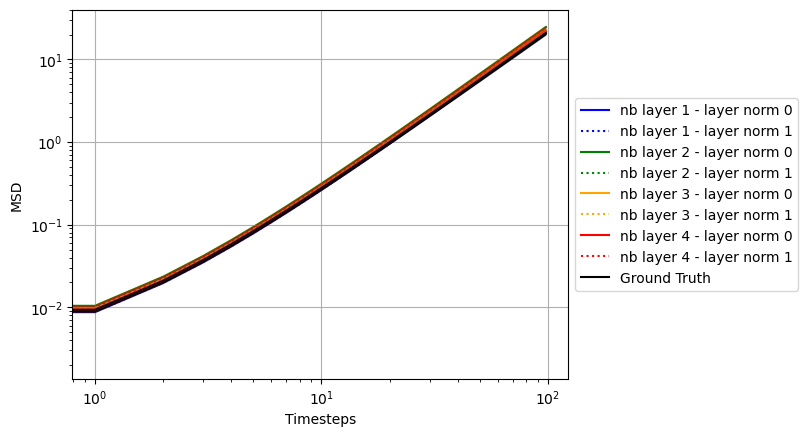

In [22]:
# plot of MSD

res_msd = []


for i in range(len(nb_layer_list)):
    print(MSD_list_normal[i][:limit_msd].shape)
    msd_mean = np.mean(MSD_list_normal[i][:, :limit_msd], axis = 0)
    msd_std = np.std(MSD_list_normal[i][:, :limit_msd], axis = 0)
    x = np.arange(limit_msd)
    plt.loglog(x, msd_mean, color = colors[i], linestyle=styles[i], zorder = 1, label = labels_graphs[i])
    plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = colors[i], alpha = 0.4, zorder = 2)
    
    res_msd.append(msd_mean)
    
msd_mean = np.mean(MSD_base_normal[:, :limit_msd], axis = 0)
msd_std = np.std(MSD_base_normal[:, :limit_msd], axis = 0)
x = np.arange(limit_msd)
plt.loglog(x, msd_mean, color = 'k', zorder = 1, label = 'Ground Truth')
plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = 'k', alpha = 0.8, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('MSD')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('MSD-gat-normal.png', bbox_inches='tight')
plt.show()


In [23]:
msd_gt = np.mean(MSD_base_normal[:, :limit_msd], axis = 0)

for i in range(len(res_msd)):
    delta = (msd_gt - res_msd[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.1613729738751112 +- 0.27631410235092096
l1: nb layer 1 - layer norm 1 >>>> 0.06402452010887678 +- 0.11988977355177945
l1: nb layer 2 - layer norm 0 >>>> 3.3452594529892603 +- 4.51460850772108
l1: nb layer 2 - layer norm 1 >>>> 0.8243534654007084 +- 1.1884380736659377
l1: nb layer 3 - layer norm 0 >>>> 0.3125930151136186 +- 0.4877445052560407
l1: nb layer 3 - layer norm 1 >>>> 0.7627735801014999 +- 1.122772968849415
l1: nb layer 4 - layer norm 0 >>>> 0.2771445018394152 +- 0.44570591727513303
l1: nb layer 4 - layer norm 1 >>>> 2.1934026473125194 +- 3.0338937274334588


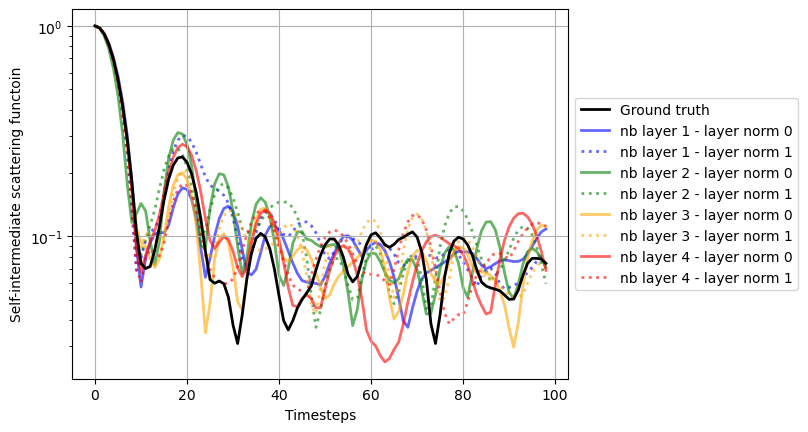

In [24]:
# plot of scat

res_scat = []

ssf_mean = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)
ssf_std = np.std(SCAT_base_normal[:, :limit_scat], axis = 0)
t = np.arange(limit_scat)
plt.semilogy(t, ssf_mean, color = 'k', lw=2, label = 'Ground truth', zorder = 2)
#plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = 'k', alpha = 0.2, zorder = 3)


for i in range(len(nb_layer_list)):
    #print(MSD_list_normal[i][:limit_scat].shape)
    ssf_mean = np.mean(SCAT_list_normal[i][:, :limit_scat], axis = 0)
    res_scat.append(ssf_mean)
    ssf_std = np.std(SCAT_list_normal[i][:, :limit_scat], axis = 0)
    t = np.arange(limit_scat)
    plt.semilogy(t, ssf_mean, color = colors[i], linestyle=styles[i], lw=2, label = labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = colors[i], alpha = 0.4, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('Self-intermediate scattering functoin')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('scat-gat.png', bbox_inches='tight')
plt.show()


In [25]:
scat_gt = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)

for i in range(len(res_scat)):
    delta = (scat_gt - res_scat[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.0012110067205838536 +- 0.0018405405589294475
l1: nb layer 1 - layer norm 1 >>>> 0.0018193989761456555 +- 0.0029711242283067406
l1: nb layer 2 - layer norm 0 >>>> 0.0021588360218895166 +- 0.0037677959243343296
l1: nb layer 2 - layer norm 1 >>>> 0.002116334153361468 +- 0.0033846221494536156
l1: nb layer 3 - layer norm 0 >>>> 0.0007396054289081404 +- 0.0008202435228544659
l1: nb layer 3 - layer norm 1 >>>> 0.0009719342000014159 +- 0.0017647877812658364
l1: nb layer 4 - layer norm 0 >>>> 0.0012574643081753357 +- 0.0015132968910155813
l1: nb layer 4 - layer norm 1 >>>> 0.0009474252123017112 +- 0.0010699649380144043


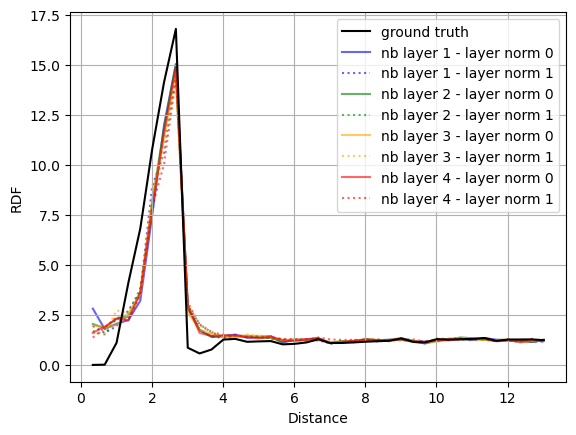

In [26]:
mean_res, std_res, r = RDF_base_normal
lim_rdf = 40

res_rdf = []


mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]

plt.plot(r, mean_res, color = 'k', label = 'ground truth', zorder = 2)
#plt.fill_between(r, mean_res - std_res, mean_res+ std_res, color = 'k', alpha = 0.4, zorder = 1)

for i in range(len(nb_layer_list)):
    #print(MSD_list_normal[i][:limit_scat].shape)
    mean_res, std_res, r = RDF_list_normal[i]
    mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
    
    res_rdf.append(mean_res)
    
    plt.plot(r, mean_res,color = colors[i], linestyle=styles[i], label =labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(r, mean_res -std_res,  mean_res + std_res, color = colors[i], alpha = 0.4, zorder = 2)

plt.xlabel('Distance')
plt.ylabel('RDF')
plt.grid()
plt.legend()


plt.savefig('rdf-gat.png', bbox_inches='tight')
plt.show()

In [27]:
mean_res, std_res, r = RDF_base_normal
mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
rdf_gt = np.mean(mean_res, axis = 0)

for i in range(len(res_rdf)):
    delta = (rdf_gt - res_rdf[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 8.082701691606983 +- 29.14401430819097
l1: nb layer 1 - layer norm 1 >>>> 7.69054868572422 +- 26.647794394001018
l1: nb layer 2 - layer norm 0 >>>> 8.217618252527581 +- 29.08252767147526
l1: nb layer 2 - layer norm 1 >>>> 7.444251607892477 +- 25.897492038948542
l1: nb layer 3 - layer norm 0 >>>> 7.753109680197784 +- 27.12421612712665
l1: nb layer 3 - layer norm 1 >>>> 7.123545122234331 +- 24.747863855770774
l1: nb layer 4 - layer norm 0 >>>> 7.940804777187818 +- 28.212223386870967
l1: nb layer 4 - layer norm 1 >>>> 6.890909395857482 +- 24.64259938657721


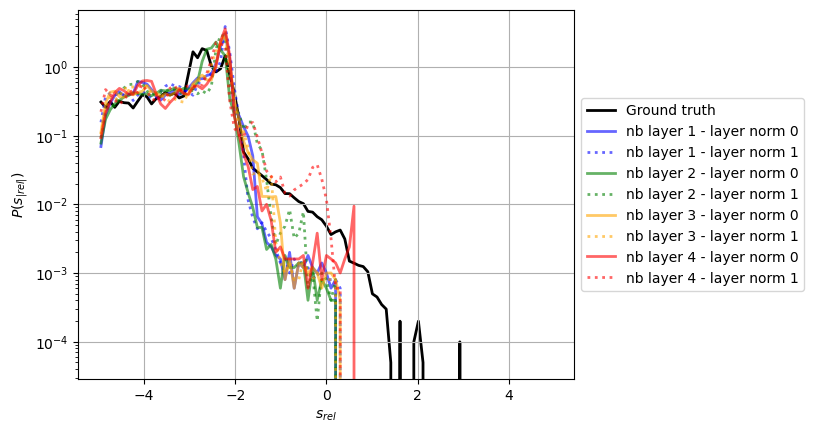

In [28]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(magn_base, axis = 0)
magn_base_std = np.std(magn_base, axis = 0)

res_magn_distr = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k',lw=2, zorder = 1, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_normal[i]
    magn_base_mean = np.mean(magn, axis = 0)
    magn_base_std = np.std(magn, axis = 0)
    
    res_magn_distr.append(magn_base_mean)
    plt.semilogy(b[1:]-db/2,magn_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)



plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{|rel|})$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-magn-gat.png', bbox_inches='tight')
plt.show()

In [29]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(magn_base, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_distr)):
    delta = (magn_gt - res_magn_distr[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.08564673158174557 +- 0.3375537400597402
l1: nb layer 1 - layer norm 1 >>>> 0.12071860711299781 +- 0.6393569202619929
l1: nb layer 2 - layer norm 0 >>>> 0.06495976635048563 +- 0.2771806529757813
l1: nb layer 2 - layer norm 1 >>>> 0.13662043672946358 +- 0.5274641199814981
l1: nb layer 3 - layer norm 0 >>>> 0.09677637238071274 +- 0.39726445666038407
l1: nb layer 3 - layer norm 1 >>>> 0.09075193714717432 +- 0.33383629251051344
l1: nb layer 4 - layer norm 0 >>>> 0.1342136503088665 +- 0.562525490142987
l1: nb layer 4 - layer norm 1 >>>> 0.09222037189464913 +- 0.3400998924998254


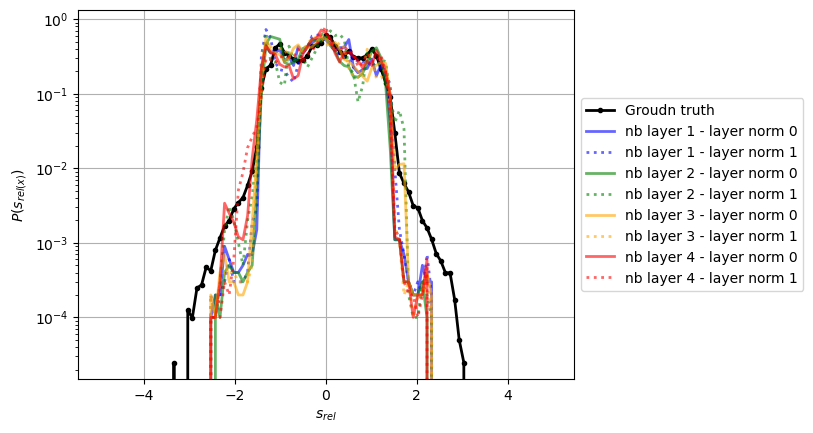

In [30]:
magn_base_mean = np.mean(x_speed, axis = 0)
magn_base_std = np.std(x_speed, axis = 0)

res_magn_x = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Groudn truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_normal[i]
    x_base_mean = np.mean(x, axis = 0)
    x_base_std = np.std(x, axis = 0)
    
    res_magn_x.append(x_base_mean)
    
    plt.semilogy(b[1:]-db/2,x_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

    
plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{rel(x)})$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('speed-x-gat.png', bbox_inches='tight')
plt.show()

In [31]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(x_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_x)):
    delta = (magn_gt - res_magn_x[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.0028240871188451823 +- 0.007003474869008889
l1: nb layer 1 - layer norm 1 >>>> 0.007357887147705205 +- 0.02918864978910864
l1: nb layer 2 - layer norm 0 >>>> 0.004104554678653797 +- 0.014027297001112334
l1: nb layer 2 - layer norm 1 >>>> 0.007881681515442744 +- 0.024444772994379554
l1: nb layer 3 - layer norm 0 >>>> 0.004068418720576782 +- 0.013137376988629833
l1: nb layer 3 - layer norm 1 >>>> 0.003758326464178216 +- 0.008676015851977885
l1: nb layer 4 - layer norm 0 >>>> 0.003445516413293425 +- 0.00952288285400597
l1: nb layer 4 - layer norm 1 >>>> 0.0021126995165060085 +- 0.005943532737922238


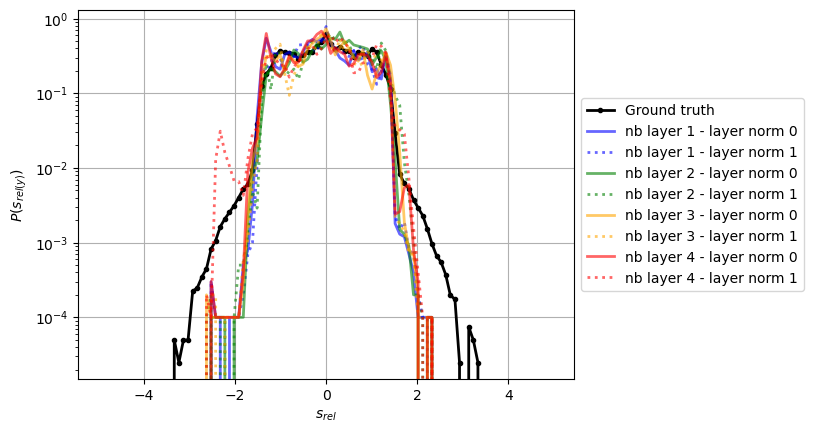

In [32]:
magn_base_mean = np.mean(y_speed, axis = 0)
magn_base_std = np.std(y_speed, axis = 0)

res_magn_y = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_normal[i]
    y_base_mean = np.mean(y, axis = 0)
    y_base_std = np.std(y, axis = 0)
    
    res_magn_y.append(y_base_mean)
    
    plt.semilogy(b[1:]-db/2,y_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')




plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{rel(y)})$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-y-gat.png', bbox_inches='tight')
plt.show()

In [33]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(y_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_y)):
    delta = (magn_gt - res_magn_y[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

l1: nb layer 1 - layer norm 0 >>>> 0.004353525282344613 +- 0.015013194004367077
l1: nb layer 1 - layer norm 1 >>>> 0.0025997760714385684 +- 0.007485708219683225
l1: nb layer 2 - layer norm 0 >>>> 0.003607779741219079 +- 0.00901593813851153
l1: nb layer 2 - layer norm 1 >>>> 0.0036125771240701453 +- 0.008633920568284572
l1: nb layer 3 - layer norm 0 >>>> 0.0032812405781599088 +- 0.009891122985861374
l1: nb layer 3 - layer norm 1 >>>> 0.0034233151767776647 +- 0.0096683062827532
l1: nb layer 4 - layer norm 0 >>>> 0.005708827966327294 +- 0.021804435205922262
l1: nb layer 4 - layer norm 1 >>>> 0.003428063292521574 +- 0.007493132495701786


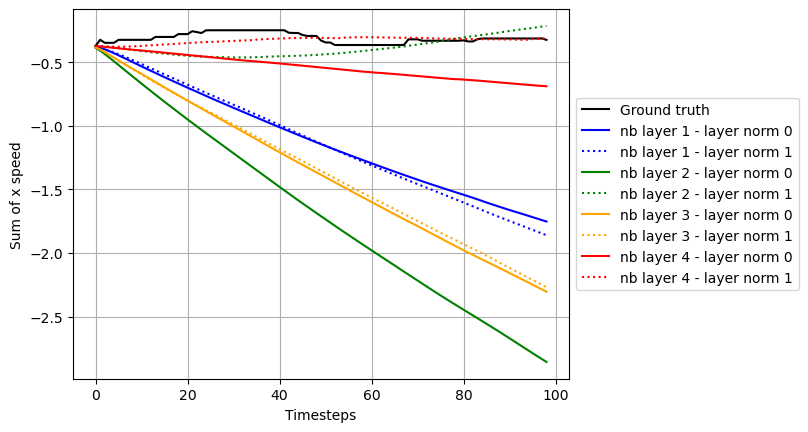

In [34]:
mean_sum = np.mean(SUM_base_normal, axis = 0)
std_sum = np.std(SUM_base_normal, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 0], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_normal[i], axis = 0)
    sum_std = np.std(SUM_list_normal[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 0], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

plt.savefig('speed-sum-x-gat.png', bbox_inches='tight')
plt.show()

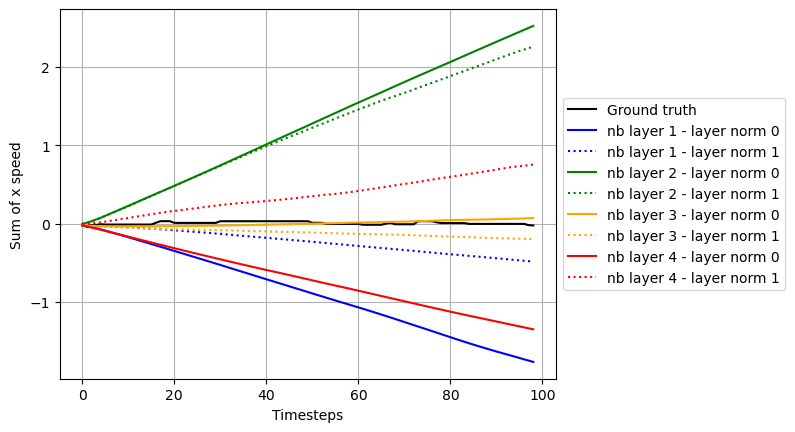

In [35]:
mean_sum = np.mean(SUM_base_normal, axis = 0)
std_sum = np.std(SUM_base_normal, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 1], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_normal[i], axis = 0)
    sum_std = np.std(SUM_list_normal[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 1], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

#plt.ylim([np.min(mean_sum[:liit_sum, 1])- 0.5, np.max(mean_sum[:liit_sum, 1])+ 0.5])

plt.savefig('speed-sum-y-gat.png', bbox_inches='tight')
plt.show()

# =======================
# =======================

In [36]:
NB_SIM = 5


def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 400


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params


params1 = getParams()

params2 = getParams()
params2.noisy = 1


#data_gt_1  = gen.get_mult_data(params1, NB_SIM)
#graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
#data_gt_list_1 = array2List(data_gt_1)


data_gt_2 = gen.get_mult_data(params2, NB_SIM)
graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
data_gt_list_2 = array2List(data_gt_2)

1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:07<00:00, 52.66it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 49.77it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 47.15it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:08<00:00, 47.97it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 399/399 [00:09<00:00, 42.39it/s]


In [37]:
start = 250
length = 100

stop = start+length

In [38]:

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)



MSD_base_noisy = stats.MSD_stat(data_gt_2[:, start:stop])
RDF_base_noisy  = stats.apply_rdf(data_gt_2[:, start:stop])
SCAT_base_noisy = stats.applySelfScattering(data_gt_2[:, start:stop])
DISTR_base_noisy = stats.apply_hist(data_gt_2, a, b)
SUM_base_noisy = stats.sumSpeeds(data_gt_2[:, start:stop])        # issue wiht libtrayr

100%|██████████| 100/100 [00:01<00:00, 86.90it/s]


In [39]:
# laoders
import dataLoading as dl
from torch_geometric.loader import DataLoader
from torch.utils.data import DataLoader as DataLoaderPy




PATH_BASE = '/home/jpierre/v2/path_datasets'

def getLoader(path, batch_size = 32, shuffleBool = True, root = None, jsonFile = None, mode = 'training'):
    datasetTraining = dl.DataLoader2(root, path = path, jsonFile = jsonFile, mode = mode)
    loader = DataLoader(datasetTraining, batch_size=batch_size, shuffle = shuffleBool)
    
    return loader

# 1s-tep loader
#p_data = '/scratch/users/jpierre/mew_0.001_normal_v2'
p_data = '/scratch/users/jpierre/mew_0.001_noisy_v2'

batchSizeEval = 128
p_json = os.path.join(PATH_BASE, f'{p_data.split("/")[-1]}.json')

loaderEval = getLoader(p_data, batch_size = batchSizeEval, jsonFile = p_json, mode = 'validation')


# rollout laoder

p_sim = os.path.join(p_data, 'validation/np_file')

loaderSim = dl.simLoader2(p_sim)
loaderSim = DataLoaderPy(loaderSim, batch_size=1, shuffle=False)

1it [00:00,  1.67it/s]


In [ ]:
MSD_list_noisy = []
RDF_list_noisy = []
SCAT_list_noisy = []
DISTR_list_noisy = []
SUM_list_noisy = []
MSE_rollout = []

a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)


device = DEVICE


errors_list = []
std_errors_list = []
angles_error_list = []
norm_errors_list = []
angle_errors_std_list = []
norm_errors_std_list = []



sim_error_list = []
sim_error_std_list = []






for i in tqdm(range(len(noisy_models_layers))):

    ## load model
    cfg = noisy_models_layers[i].cfg
    std_path = noisy_models_layers[i].path
    model = getModel(cfg, std_path)


    ## compute the trajectory

    data_pred = nn_gen.generate_sim_batch(model = model,
                                        gt = data_gt_2, 
                                        initId = start,
                                        nbStep = length,
                                        dt_scale = 1,
                                        device = DEVICE
                                        )

    # compute the stats

    msd = stats.MSD_stat(data_pred.copy())
    rdf = stats.apply_rdf(data_pred.copy())
    scat = stats.applySelfScattering(data_pred.copy())
    speed_distr = stats.apply_hist(data_pred.copy(), a, b)
    sum_speed = stats.sumSpeeds(data_pred.copy())
    mse_roll = stats.apply_mse_roll(data_pred.copy()[:, :length],data_gt_2.copy()[:, start:stop])



    MSD_list_noisy.append(msd)
    RDF_list_noisy.append(rdf)
    SCAT_list_noisy.append(scat)
    DISTR_list_noisy.append(speed_distr)
    SUM_list_noisy.append(sum_speed)
    
    
    
    
    cfg_eval = EvaluationCfg()
    cfg_eval.norm_angleError = Param_eval(path = os.path.join(os.getcwd(), 'angle.png'))
    #cfg_eval.L1_vect = Param_eval(wandbName = 'Std message')
    cfg_eval.degree_error = Param_eval(path = os.path.join(os.getcwd(), 'degree.png'))


    # loader ...

    errors = []
    normError = []
    angleError = []
    
    for d, _ in tqdm(loaderEval, leave = False):
        d = d.to(device)
        d.x = d.x[:, 2:]
        d = normalizeGraph(d)
        pred = model(d)  
        
        d.y = torch.swapaxes(d.y, 0, 1)
        

        #evalLoss += torch.nn.functional.l1_loss(pred.reshape(-1), d.y[0, :, :].reshape(-1))
        
        
        errors.extend(torch.abs(pred - d.y[0, :, :]).cpu().detach().numpy().tolist())
        
        
        errorAngle, errorNorm = errorsDiv(pred.cpu().detach().numpy(), d.y[0, :, :].cpu().detach().numpy())
        
        normError.extend(errorNorm.tolist())
        angleError.extend(errorAngle.tolist())


    erros1 = np.mean(errors)
    errors_std = np.std(errors)

    angle_error = np.median(errorAngle)
    norm_error = np.median(normError)

    angle_std = np.std(errorAngle)
    norm_std  = np.std(normError)


    # add to the other lists
    errors_list.append(erros1)
    std_errors_list.append(errors_std)
    angles_error_list.append(angle_std)
    norm_errors_list.append(norm_error)
    angle_errors_std_list.append(angle_std)
    norm_errors_std_list.append(norm_std)
    
    
    
    
    ################
    
    
    eval_loss_list = []

    for d, _ in loaderSim:

        d = torch.squeeze(d, dim = 0).numpy()
        start_id = 8       # not 0
        res = getSimulationData(model, 15, d, i = start_id, device = DEVICE)
        L = res.shape[0]

        eval_loss_list.append(torch.nn.functional.l1_loss(res.reshape(-1), torch.from_numpy(d[start_id:(start_id + L), :, :].copy()).reshape(-1).to(device)).cpu().detach().numpy())

    
    
    sim_error_list.append(np.mean(eval_loss_list))
    sim_error_std_list.append(np.std(eval_loss_list))



  0%|          | 0/8 [00:00<?, ?it/s]

>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 243.21it/s]

100%|██████████| 99/99 [00:00<00:00, 190.76it/s]

100%|██████████| 99/99 [00:00<00:00, 188.13it/s]

100%|██████████| 99/99 [00:00<00:00, 198.44it/s]

100%|██████████| 99/99 [00:00<00:00, 184.27it/s]

100%|██████████| 100/100 [00:01<00:00, 65.17it/s][A

100%|██████████| 100/100 [00:01<00:00, 68.91it/s][A

100%|██████████| 100/100 [00:01<00:00, 74.53it/s][A

100%|██████████| 100/100 [00:01<00:00, 69.97it/s][A

100%|██████████| 100/100 [00:01<00:00, 68.94it/s][A

 42%|████▏     | 65/155 [01:17<01:16,  1.18it/s]


100%|██████████| 155/155 [02:29<00:00,  2.11it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 252.83it/s]

100%|██████████| 15/15 [00:00<00:00, 253.96it/s]

100%|██████████| 15/15 [00:00<00:00, 254.36it/s]

100%|██████████| 15/15 [00:00<00:00, 250.08it/s]

100%|██████████| 15/15 [00:00<00:00, 174.03it/s]

100%|██████████| 15/15 [00:00<00:00, 249.17it/s]

100%|██████████| 15/15 [00:00<00:00, 261.52it/s]

100%|██████████| 15/15 [00:00<00:00, 246.91it/s]

100%|██████████| 15/15 [00:00<00:00, 177.15it/s]

100%|██████████| 15/15 [00:00<00:00, 192.60it/s]

100%|██████████| 15/15 [00:00<00:00, 192.08it/s]

100%|██████████| 15/15 [00:00<00:00, 191.34it/s]

100%|██████████| 15/15 [00:00<00:00, 183.76it/s]

100%|██████████| 15/15 [00:00<00:00, 185.58it/s]

100%|██████████| 15/15 [00:00<00:00, 186.48it/s]

100%|██████████| 15/15 [00:00<00:00, 186.24it/s]

100%|██████████| 15/15 [00:00<00:00, 172.13it/s]

100%|██████████| 15/15 [00:00<00:00, 202.31it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 192.09it/s]

100%|██████████| 99/99 [00:00<00:00, 203.16it/s]

100%|██████████| 99/99 [00:00<00:00, 223.90it/s]

100%|██████████| 99/99 [00:00<00:00, 194.07it/s]

100%|██████████| 99/99 [00:00<00:00, 221.98it/s]

100%|██████████| 100/100 [00:01<00:00, 73.14it/s][A

100%|██████████| 100/100 [00:01<00:00, 70.34it/s]

100%|██████████| 100/100 [00:01<00:00, 75.17it/s][A

100%|██████████| 100/100 [00:01<00:00, 67.56it/s][A

100%|██████████| 100/100 [00:01<00:00, 72.89it/s]

 43%|████▎     | 66/155 [00:44<01:08,  1.31it/s]


100%|██████████| 155/155 [01:44<00:00,  1.86it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 202.76it/s]

100%|██████████| 15/15 [00:00<00:00, 210.45it/s]

100%|██████████| 15/15 [00:00<00:00, 202.77it/s]

100%|██████████| 15/15 [00:00<00:00, 202.89it/s]

100%|██████████| 15/15 [00:00<00:00, 210.07it/s]

100%|██████████| 15/15 [00:00<00:00, 205.52it/s]

100%|██████████| 15/15 [00:00<00:00, 209.04it/s]

100%|██████████| 15/15 [00:00<00:00, 249.49it/s]

100%|██████████| 15/15 [00:00<00:00, 250.58it/s]

100%|██████████| 15/15 [00:00<00:00, 251.55it/s]

100%|██████████| 15/15 [00:00<00:00, 247.40it/s]

100%|██████████| 15/15 [00:00<00:00, 252.65it/s]

100%|██████████| 15/15 [00:00<00:00, 252.83it/s]

100%|██████████| 15/15 [00:00<00:00, 249.30it/s]

100%|██████████| 15/15 [00:00<00:00, 245.05it/s]

100%|██████████| 15/15 [00:00<00:00, 250.06it/s]

100%|██████████| 15/15 [00:00<00:00, 249.55it/s]

100%|██████████| 15/15 [00:00<00:00, 247.66it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 190.15it/s]

100%|██████████| 99/99 [00:00<00:00, 130.62it/s]

100%|██████████| 99/99 [00:00<00:00, 150.72it/s]

100%|██████████| 99/99 [00:00<00:00, 149.55it/s]

100%|██████████| 99/99 [00:00<00:00, 145.54it/s]

100%|██████████| 100/100 [00:01<00:00, 66.73it/s][A

100%|██████████| 100/100 [00:01<00:00, 67.13it/s][A

100%|██████████| 100/100 [00:01<00:00, 65.89it/s]

100%|██████████| 100/100 [00:01<00:00, 73.25it/s][A

100%|██████████| 100/100 [00:01<00:00, 75.93it/s][A

 36%|███▌      | 56/155 [00:37<00:58,  1.70it/s]


100%|██████████| 155/155 [01:42<00:00,  1.60it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 164.71it/s]

100%|██████████| 15/15 [00:00<00:00, 164.94it/s]

100%|██████████| 15/15 [00:00<00:00, 164.33it/s]

100%|██████████| 15/15 [00:00<00:00, 162.31it/s]

100%|██████████| 15/15 [00:00<00:00, 169.72it/s]

100%|██████████| 15/15 [00:00<00:00, 165.71it/s]

100%|██████████| 15/15 [00:00<00:00, 163.33it/s]

100%|██████████| 15/15 [00:00<00:00, 131.84it/s]

100%|██████████| 15/15 [00:00<00:00, 163.36it/s]

100%|██████████| 15/15 [00:00<00:00, 165.02it/s]

100%|██████████| 15/15 [00:00<00:00, 163.89it/s]

100%|██████████| 15/15 [00:00<00:00, 130.94it/s]

100%|██████████| 15/15 [00:00<00:00, 167.10it/s]

100%|██████████| 15/15 [00:00<00:00, 186.22it/s]

100%|██████████| 15/15 [00:00<00:00, 159.80it/s]

100%|██████████| 15/15 [00:00<00:00, 159.88it/s]

100%|██████████| 15/15 [00:00<00:00, 163.71it/s]

100%|██████████| 15/15 [00:00<00:00, 164.33it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 160.65it/s]

100%|██████████| 99/99 [00:00<00:00, 155.30it/s]

100%|██████████| 99/99 [00:00<00:00, 146.61it/s]

100%|██████████| 99/99 [00:00<00:00, 165.07it/s]

100%|██████████| 99/99 [00:00<00:00, 184.43it/s]

100%|██████████| 100/100 [00:01<00:00, 83.82it/s][A

100%|██████████| 100/100 [00:01<00:00, 84.09it/s][A

100%|██████████| 100/100 [00:01<00:00, 84.31it/s][A

100%|██████████| 100/100 [00:01<00:00, 86.09it/s][A

100%|██████████| 100/100 [00:01<00:00, 84.26it/s][A

 43%|████▎     | 67/155 [00:41<00:47,  1.84it/s]


100%|██████████| 155/155 [01:33<00:00,  1.78it/s]
                                                 
100%|██████████| 15/15 [00:00<00:00, 198.20it/s]

100%|██████████| 15/15 [00:00<00:00, 183.05it/s]

100%|██████████| 15/15 [00:00<00:00, 218.78it/s]

100%|██████████| 15/15 [00:00<00:00, 163.96it/s]

100%|██████████| 15/15 [00:00<00:00, 205.44it/s]

100%|██████████| 15/15 [00:00<00:00, 195.18it/s]

100%|██████████| 15/15 [00:00<00:00, 207.05it/s]

100%|██████████| 15/15 [00:00<00:00, 218.87it/s]

100%|██████████| 15/15 [00:00<00:00, 216.48it/s]

100%|██████████| 15/15 [00:00<00:00, 218.21it/s]

100%|██████████| 15/15 [00:00<00:00, 216.89it/s]

100%|██████████| 15/15 [00:00<00:00, 203.94it/s]

100%|██████████| 15/15 [00:00<00:00, 204.17it/s]

100%|██████████| 15/15 [00:00<00:00, 206.22it/s]

100%|██████████| 15/15 [00:00<00:00, 211.10it/s]

100%|██████████| 15/15 [00:00<00:00, 209.98it/s]

100%|██████████| 15/15 [00:00<00:00, 221.92it/s]

100%|██████████| 15/15 [00:00<00:00, 218.24it/s]



>>>>>>>>>>> Loading GaT model



100%|██████████| 99/99 [00:00<00:00, 169.93it/s]

100%|██████████| 99/99 [00:00<00:00, 160.05it/s]

100%|██████████| 99/99 [00:00<00:00, 156.44it/s]

100%|██████████| 99/99 [00:00<00:00, 162.35it/s]

100%|██████████| 99/99 [00:00<00:00, 168.24it/s]

100%|██████████| 100/100 [00:00<00:00, 115.47it/s][A

100%|██████████| 100/100 [00:00<00:00, 103.18it/s][A

100%|██████████| 100/100 [00:00<00:00, 113.13it/s][A

100%|██████████| 100/100 [00:00<00:00, 115.93it/s]

100%|██████████| 100/100 [00:00<00:00, 109.57it/s][A

 53%|█████▎    | 82/155 [00:49<00:43,  1.67it/s]


 86%|████████▌ | 133/155 [01:17<00:12,  1.74it/s]


In [ ]:
print(f'errors ==>  {errors_list}')
print(f'errors std ==> {std_errors_list}')
print(f'angle_error ==>  {angles_error_list}')
print(f'angle_std std ==> {angle_errors_std_list}')
print(f'norm_errors_list ==>  {norm_errors_list}')
print(f'norm_errors_std_list std ==> {norm_errors_std_list}')

print(f'sim_error_list ==>  {sim_error_list}')
print(f'sim_error_std_list std ==> {sim_error_std_list}')

In [ ]:
nb_layer_list = [noisy_models_layers[i].nbLayer for i in range(len(noisy_models_layers))]
# layer norm
print(nb_layer_list)

In [ ]:
labels_graphs = [f'nb layer {normal_models_layers[i].nbLayer} - layer norm {noisy_models_layers[i].layerNorm}' for i in range(len(noisy_models_layers))]
print(labels_graphs)

In [ ]:
colors = ['blue','blue', 'green', 'green', 'orange','orange', 'red', 'red']
styles = ['solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted']

In [ ]:
limit_scat = 99
limit_msd = 99


In [ ]:
# plot of MSD

res_msd = []


for i in range(len(nb_layer_list)):
    print(MSD_list_noisy[i][:limit_msd].shape)
    msd_mean = np.mean(MSD_list_noisy[i][:, :limit_msd], axis = 0)
    msd_std = np.std(MSD_list_noisy[i][:, :limit_msd], axis = 0)
    x = np.arange(limit_msd)
    plt.loglog(x, msd_mean, color = colors[i], linestyle=styles[i], zorder = 1, label = labels_graphs[i])
    plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = colors[i], alpha = 0.4, zorder = 2)
    
    res_msd.append(msd_mean)
    
msd_mean = np.mean(MSD_base_noisy[:, :limit_msd], axis = 0)
msd_std = np.std(MSD_base_noisy[:, :limit_msd], axis = 0)
x = np.arange(limit_msd)
plt.loglog(x, msd_mean, color = 'k', zorder = 1, label = 'Ground Truth')
plt.fill_between((x), (msd_mean - msd_std), (msd_mean+msd_std), color = 'k', alpha = 0.2, zorder = 2)
    
plt.xlabel('Timesteps')
plt.ylabel('MSD')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('MSD-gat-noisy.png', bbox_inches='tight')
plt.show()


In [ ]:
msd_gt = np.mean(MSD_base_noisy[:, :limit_msd], axis = 0)

for i in range(len(res_msd)):
    delta = (msd_gt - res_msd[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
# plot of scat

res_scat = []


ssf_mean = np.mean(SCAT_base_noisy[:, :limit_scat], axis = 0)
ssf_std = np.std(SCAT_base_noisy[:, :limit_scat], axis = 0)
t = np.arange(limit_scat)
plt.semilogy(t, ssf_mean, color = 'k', lw=2, label = 'Ground truth', zorder = 2)
#plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = 'k', alpha = 0.2, zorder = 3)


for i in range(len(nb_layer_list)):
    #print(MSD_list_noisy[i][:limit_scat].shape)
    ssf_mean = np.mean(SCAT_list_noisy[i][:, :limit_scat], axis = 0)
    ssf_std = np.std(SCAT_list_noisy[i][:, :limit_scat], axis = 0)
    t = np.arange(limit_scat)
    plt.semilogy(t, ssf_mean, color = colors[i], linestyle=styles[i], lw=2, label = labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(t, ssf_mean -ssf_std,  ssf_mean + ssf_std, color = colors[i], alpha = 0.4, zorder = 2)
    res_scat.append(ssf_mean)

    
plt.xlabel('Timesteps')
plt.ylabel('Self-intermediate scattering functoin')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('scat-gat-noisy.png', bbox_inches='tight')
plt.show()


In [ ]:
scat_gt = np.mean(SCAT_base_normal[:, :limit_scat], axis = 0)

for i in range(len(res_scat)):
    delta = (scat_gt - res_scat[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
mean_res, std_res, r = RDF_base_noisy
lim_rdf = 40

res_rdf = []

mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]

plt.plot(r, mean_res, color = 'k', label = 'ground truth', zorder = 2)
#plt.fill_between(r, mean_res - std_res, mean_res+ std_res, color = 'k', alpha = 0.4, zorder = 1)

for i in range(len(nb_layer_list)):
    #print(MSD_list_noisy[i][:limit_scat].shape)
    mean_res, std_res, r = RDF_list_noisy[i]
    mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
    
    plt.plot(r, mean_res,color = colors[i], linestyle=styles[i], label =labels_graphs[i], alpha = 0.6, zorder = 1)
    #plt.fill_between(r, mean_res -std_res,  mean_res + std_res, color = colors[i], alpha = 0.4, zorder = 2)
    res_rdf.append(mean_res)

plt.xlabel('Distance')
plt.ylabel('RDF')
plt.grid()
plt.legend()


plt.savefig('rdf-gat-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
mean_res, std_res, r = RDF_base_normal
mean_res, std_res, r = mean_res[1:lim_rdf], std_res[1: lim_rdf], r[1: lim_rdf]
rdf_gt = np.mean(mean_res, axis = 0)

for i in range(len(res_rdf)):
    delta = (rdf_gt - res_rdf[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_noisy

magn_base_mean = np.mean(magn_base, axis = 0)
magn_base_std = np.std(magn_base, axis = 0)

res_magn_distr = []



fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k',lw=2, zorder = 1, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_noisy[i]
    magn_base_mean = np.mean(magn, axis = 0)
    magn_base_std = np.std(magn, axis = 0)
    plt.semilogy(b[1:]-db/2,magn_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)
    res_magn_distr.append(magn_base_mean)



plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{|rel|})$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-magn-gat-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(magn_base, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_distr)):
    delta = (magn_gt - res_magn_distr[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
magn_base_mean = np.mean(x_speed, axis = 0)
magn_base_std = np.std(x_speed, axis = 0)

res_magn_x = []


fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Groudn truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_noisy[i]
    x_base_mean = np.mean(x, axis = 0)
    x_base_std = np.std(x, axis = 0)
    plt.semilogy(b[1:]-db/2,x_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)
    res_magn_x.append(x_base_mean)

    
plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{rel}(x))$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('speed-x-gat-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(x_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_x)):
    delta = (magn_gt - res_magn_x[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
magn_base_mean = np.mean(y_speed, axis = 0)
magn_base_std = np.std(y_speed, axis = 0)

res_magn_y = []

fig=plt.figure()
db=b[1]-b[0]
plt.grid()
plt.semilogy(b[1:]-db/2,magn_base_mean,'k.-',lw=2, label = 'Ground truth')
#plt.fill_between(b[1:]-db/2, magn_base_mean - magn_base_std, magn_base_mean + magn_base_std, color = 'r', alpha = 0.4)


for i in range(len(nb_layer_list)):
    magn, x, y = DISTR_list_noisy[i]
    y_base_mean = np.mean(y, axis = 0)
    y_base_std = np.std(y, axis = 0)
    plt.semilogy(b[1:]-db/2,y_base_mean,color = colors[i], linestyle=styles[i], label =labels_graphs[i], lw=2, zorder = 2, alpha = 0.6)

    res_magn_y.append(y_base_mean)

plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')




plt.xlabel('$s_{rel}$')
plt.ylabel('$P(s_{rel}(y))$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed-y-gat-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
magn_base, x_speed, y_speed = DISTR_base_normal

magn_base_mean = np.mean(y_speed, axis = 0)

magn_gt = magn_base_mean

for i in range(len(res_magn_y)):
    delta = (magn_gt - res_magn_y[i]) ** 2
    print(f'l1: {labels_graphs[i]} >>>> {np.mean(delta)} +- {np.std(delta)}')

In [ ]:
mean_sum = np.mean(SUM_base_noisy, axis = 0)
std_sum = np.std(SUM_base_noisy, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 0], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_noisy[i], axis = 0)
    sum_std = np.std(SUM_list_noisy[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 0], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

plt.savefig('speed-sum-x-gat-noisy.png', bbox_inches='tight')
plt.show()

In [ ]:
mean_sum = np.mean(SUM_base_noisy, axis = 0)
std_sum = np.std(SUM_base_noisy, axis = 0)

liit_sum = 300

plt.plot(mean_sum[:liit_sum, 1], color = 'k', label = 'Ground truth')


for i in range(len(nb_layer_list)):
    sum_mean = np.mean(SUM_list_noisy[i], axis = 0)
    sum_std = np.std(SUM_list_noisy[i], axis = 0)
    
    plt.plot(sum_mean[:liit_sum, 1], color = colors[i], linestyle=styles[i], label =labels_graphs[i])

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel('Timesteps')
plt.ylabel('Sum of x speed')

plt.savefig('speed-sum-y-gat-noisy.png', bbox_inches='tight')
plt.show()